In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import SGDClassifier  # Changed import
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb  
from sklearn.neural_network import MLPClassifier  
from sklearn.preprocessing import LabelEncoder



In [ ]:
Train = pd.read_excel('Data.xlsx')
#Train=pd.read_csv('logs.csv')
Train = Train.sample(frac=1, random_state=42).reset_index(drop=True)


In [96]:
Train['type'].unique()

array(['LEEF', 'CEF', 'auth', 'Access', 'error_nginx', 'Firewall',
       'syslog', 'Juniper'], dtype=object)

In [ ]:
def preprocess_log(log):
    if not isinstance(log, str):  # Convert non-string values to empty string
        log = str(log) if log is not None else ""
    
    log = re.sub(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', '', log)  # Remove timestamps
    log = re.sub(r'[^\w\s]', '', log).lower()  # Remove special characters & convert to lowercase
    return log


# def preprocess_log(log):
#     if not isinstance(log, str):  # Ensure it's a string
#         log = str(log) if log is not None else ""

#     # Remove timestamps (e.g., "Feb 16 14:38:29")
#     log = re.sub(r'\b\w{3} \d{1,2} \d{2}:\d{2}:\d{2}\b', '', log)

#     # Remove IP addresses (e.g., "192.168.1.50")
#     log = re.sub(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', '', log)

#     # Remove HTTP methods and response codes (e.g., "GET", "POST", "200")
#     log = re.sub(r'\b(GET|POST|PUT|DELETE|HEAD|OPTIONS|CONNECT|TRACE|PATCH)\b', '', log)
#     log = re.sub(r'\bHTTP\/\d\.\d\b', '', log)  # Remove HTTP version
#     log = re.sub(r'\b\d{3}\b', '', log)  # Remove status codes (e.g., 200, 403, 404)

#     # Remove special characters and convert to lowercase
#     log = re.sub(r'[^\w\s]', '', log).lower()

#     # Remove extra whitespace
#     log = re.sub(r'\s+', ' ', log).strip()

#     return log

In [98]:
Train['Logs'] = Train['Logs'].apply(preprocess_log)

In [99]:
Train.head()

,Logs,type
0,leef20ciscoasa911002srcdstprototcpdptmsgconnec...,LEEF
1,cef0fireeyehx endpoint security533333rootkit d...,CEF
2,ip107720 sudo ubuntu ttypts0 pwdusrsharefilebe...,auth
3,17may2015100534 0000 downloadsproduct_1 debian...,Access
4,17may2015160555 0000 downloadsproduct_1 debian...,Access


In [100]:
Train.dropna(inplace=True)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(Train['Logs'], Train['type'], test_size=0.2, random_state=42)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape    

((1428,), (357,), (1428,), (357,))

In [103]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train

Training SGDClassifier...

🔹 **SGDClassifier**
Accuracy: 0.9747899159663865
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.76      1.00      0.86        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       1.00      0.27      0.43        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.95      0.95      0.95        20

    accuracy                           0.97       357
   macro avg       0.96      0.90      0.91       357
weighted avg       0.98      0.97      0.97       357



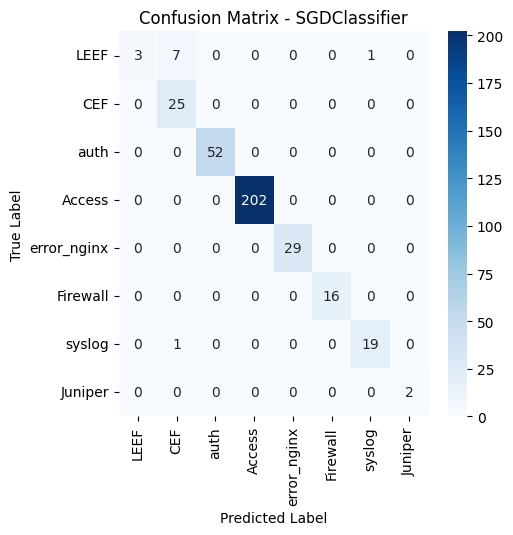

Training LogisticRegression...

🔹 **LogisticRegression**
Accuracy: 0.9719887955182073
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.75      0.96      0.84        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.75      0.27      0.40        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.95      0.95      0.95        20

    accuracy                           0.97       357
   macro avg       0.93      0.90      0.90       357
weighted avg       0.97      0.97      0.97       357



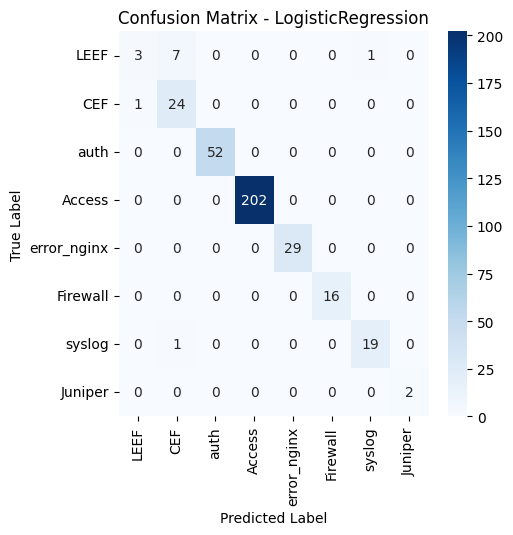

Training RandomForest...

🔹 **RandomForest**
Accuracy: 0.9439775910364145
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       1.00      0.68      0.81        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.37      1.00      0.54        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.89      0.40      0.55        20

    accuracy                           0.94       357
   macro avg       0.91      0.89      0.86       357
weighted avg       0.97      0.94      0.95       357



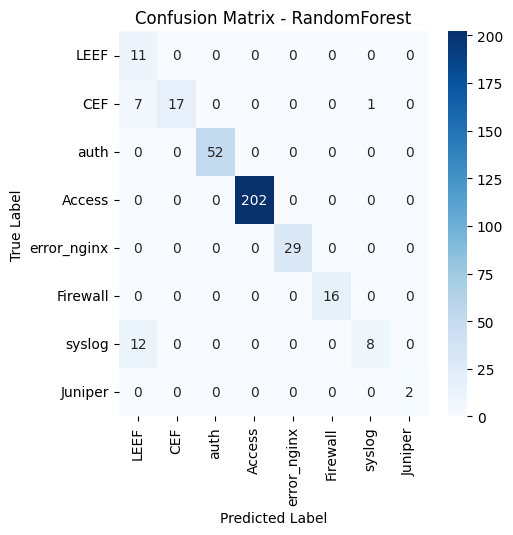

Training GradientBoosting...

🔹 **GradientBoosting**
Accuracy: 0.9551820728291317
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.66      0.84      0.74        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.58      0.64      0.61        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       1.00      0.60      0.75        20

    accuracy                           0.96       357
   macro avg       0.90      0.88      0.89       357
weighted avg       0.96      0.96      0.96       357



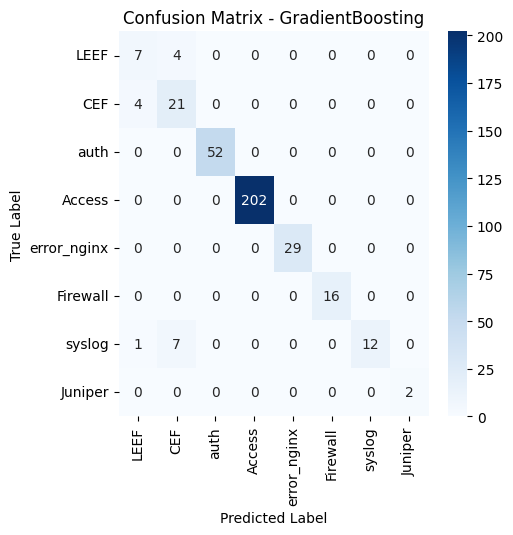

Training SVM...

🔹 **SVM**
Accuracy: 0.9747899159663865
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.78      1.00      0.88        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       1.00      0.27      0.43        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.90      0.95      0.93        20

    accuracy                           0.97       357
   macro avg       0.96      0.90      0.90       357
weighted avg       0.98      0.97      0.97       357



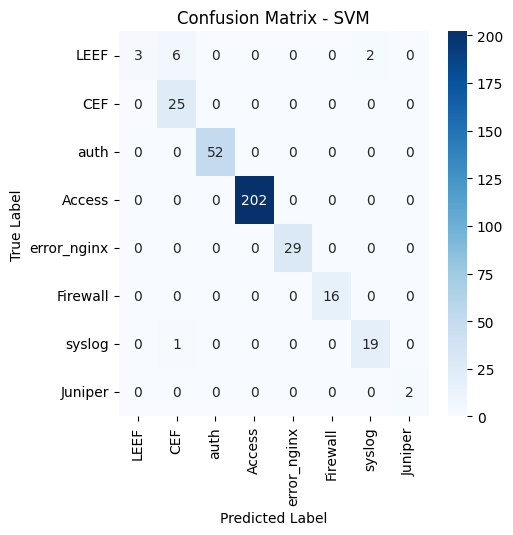

Training KNN...

🔹 **KNN**
Accuracy: 0.957983193277311
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.79      0.88      0.83        25
    Firewall       0.89      1.00      0.94        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.67      0.55      0.60        11
        auth       0.96      0.98      0.97        52
 error_nginx       0.94      1.00      0.97        29
      syslog       1.00      0.70      0.82        20

    accuracy                           0.96       357
   macro avg       0.90      0.89      0.89       357
weighted avg       0.96      0.96      0.96       357



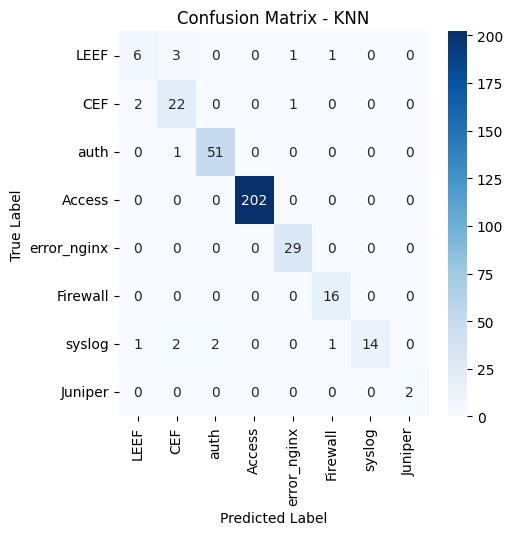

Training XGBoost...


C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 **XGBoost**
Accuracy: 0.9607843137254902
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.95      0.84      0.89        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.48      1.00      0.65        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.91      0.50      0.65        20

    accuracy                           0.96       357
   macro avg       0.92      0.92      0.90       357
weighted avg       0.98      0.96      0.96       357



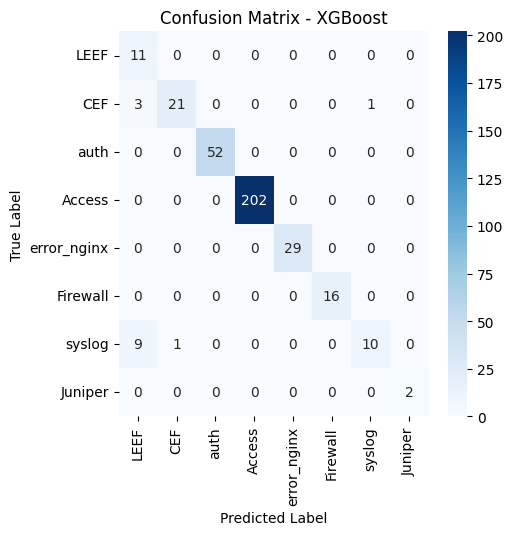

Training NeuralNetwork...

🔹 **NeuralNetwork**
Accuracy: 0.9775910364145658
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       202
         CEF       0.83      0.96      0.89        25
    Firewall       1.00      1.00      1.00        16
     Juniper       1.00      1.00      1.00         2
        LEEF       0.86      0.55      0.67        11
        auth       1.00      1.00      1.00        52
 error_nginx       1.00      1.00      1.00        29
      syslog       0.95      0.90      0.92        20

    accuracy                           0.98       357
   macro avg       0.95      0.93      0.93       357
weighted avg       0.98      0.98      0.98       357



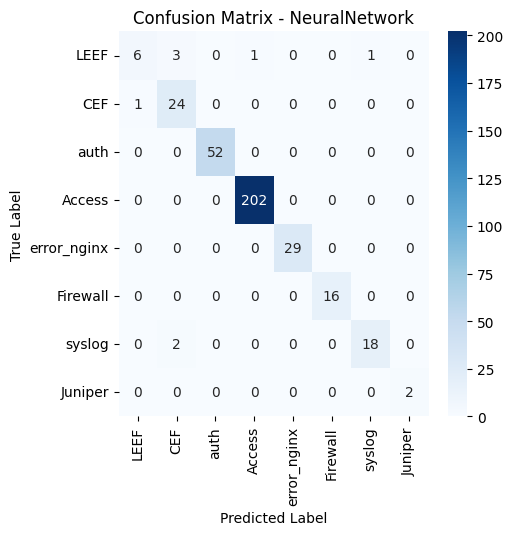

In [104]:
models = {
    "SGDClassifier": SGDClassifier(loss='log_loss', class_weight='balanced', alpha=0.0001, max_iter=1000, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
}
# Encode categorical labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for name, model in models.items():
    print(f"Training {name}...")
    if name == "XGBoost":
        model.fit(X_train_tfidf, y_train_encoded)  # Use encoded labels
        y_pred_encoded = model.predict(X_test_tfidf)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)  # Convert back to original labels
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
    
    
    # Accuracy & Report
    print(f"\n🔹 **{name}**")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=Train['type'].unique())
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=Train['type'].unique(), yticklabels=Train['type'].unique())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Test 

Training SGDClassifier...

🔹 **SGDClassifier**
Accuracy: 0.9520958083832335
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      0.33      0.50        12
 error_nginx       0.96      1.00      0.98        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.95       167
   macro avg       0.66      0.56      0.58       167
weighted avg       0.99      0.95      0.96       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

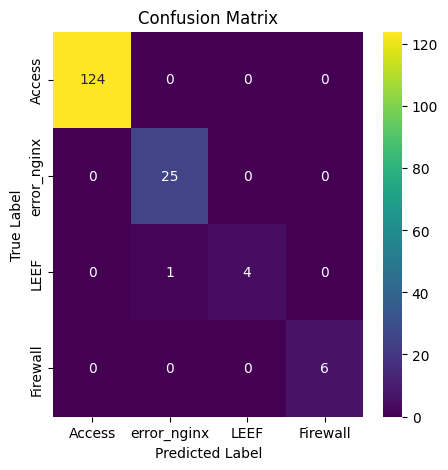

Training LogisticRegression...

🔹 **LogisticRegression**
Accuracy: 0.9520958083832335
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      0.33      0.50        12
 error_nginx       0.96      1.00      0.98        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.95       167
   macro avg       0.66      0.56      0.58       167
weighted avg       0.99      0.95      0.96       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

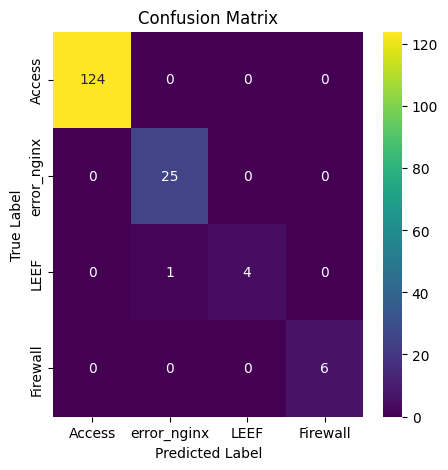

Training RandomForest...

🔹 **RandomForest**
Accuracy: 1.0
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      1.00      1.00        12
 error_nginx       1.00      1.00      1.00        25

    accuracy                           1.00       167
   macro avg       1.00      1.00      1.00       167
weighted avg       1.00      1.00      1.00       167



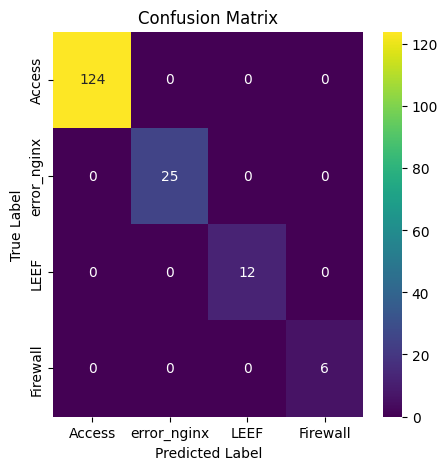

Training GradientBoosting...

🔹 **GradientBoosting**
Accuracy: 0.9461077844311377
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      0.25      0.40        12
 error_nginx       1.00      1.00      1.00        25

    accuracy                           0.95       167
   macro avg       0.80      0.65      0.68       167
weighted avg       1.00      0.95      0.96       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

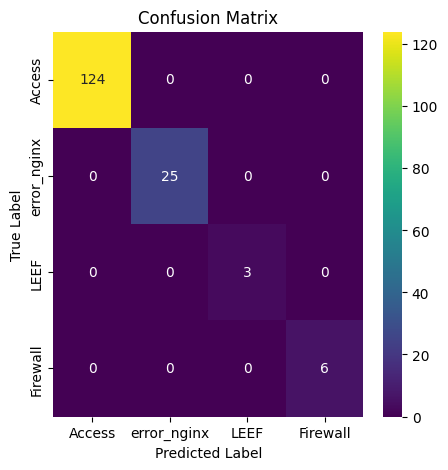

Training SVM...

🔹 **SVM**
Accuracy: 0.9580838323353293
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      0.42      0.59        12
 error_nginx       1.00      1.00      1.00        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.96       167
   macro avg       0.67      0.57      0.60       167
weighted avg       1.00      0.96      0.97       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

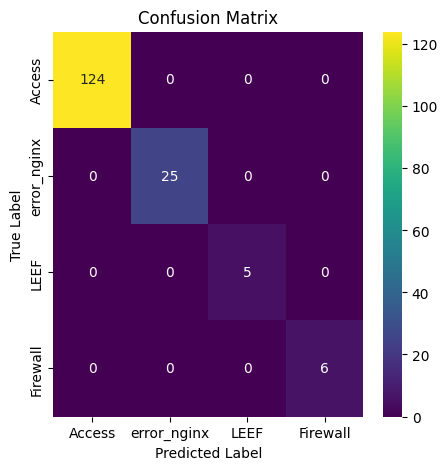

Training KNN...

🔹 **KNN**
Accuracy: 0.9461077844311377
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       0.75      1.00      0.86         6
        LEEF       1.00      0.25      0.40        12
 error_nginx       0.96      1.00      0.98        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.95       167
   macro avg       0.62      0.54      0.54       167
weighted avg       0.99      0.95      0.95       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

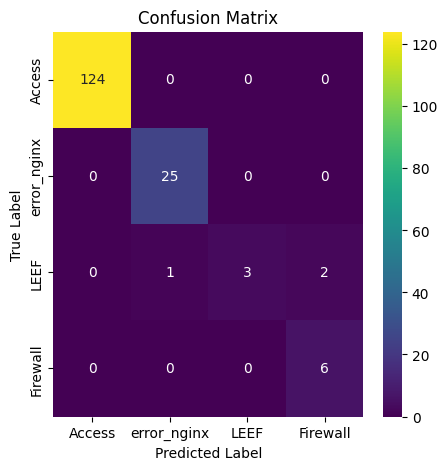

Training XGBoost...

🔹 **XGBoost**
Accuracy: 0.9461077844311377
              precision    recall  f1-score   support

      Access       1.00      1.00      1.00       124
         CEF       0.00      0.00      0.00         0
    Firewall       0.75      1.00      0.86         6
        LEEF       1.00      0.25      0.40        12
 error_nginx       0.96      1.00      0.98        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.95       167
   macro avg       0.62      0.54      0.54       167
weighted avg       0.99      0.95      0.95       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

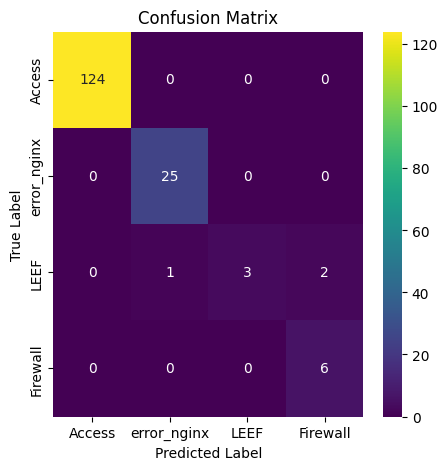

Training NeuralNetwork...

🔹 **NeuralNetwork**
Accuracy: 0.9580838323353293
              precision    recall  f1-score   support

      Access       0.98      1.00      0.99       124
         CEF       0.00      0.00      0.00         0
    Firewall       1.00      1.00      1.00         6
        LEEF       1.00      0.42      0.59        12
 error_nginx       0.96      1.00      0.98        25
      syslog       0.00      0.00      0.00         0

    accuracy                           0.96       167
   macro avg       0.66      0.57      0.59       167
weighted avg       0.98      0.96      0.96       167



C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alyra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: Unde

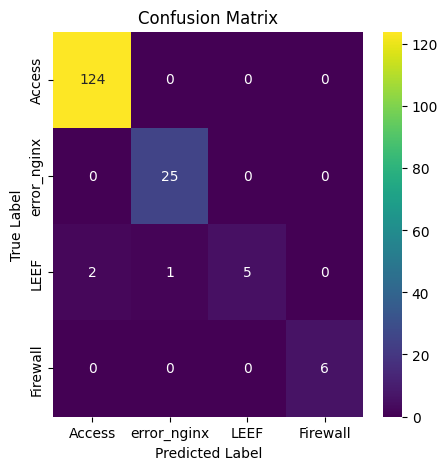

In [106]:
Test = pd.read_excel('Test2.xlsx')
Test = Test.sample(frac=1, random_state=42).reset_index(drop=True)
Test['Logs'] = Test['Logs'].apply(preprocess_log)
Test.dropna(inplace=True)
Test_X=Test['Logs']
Test_y=Test['type']
Test_X_tfidf = vectorizer.transform(Test_X)
Test_Y_encoded = label_encoder.transform(Test_y)

for name, model in models.items():
    print(f"Training {name}...")

    if name == "XGBoost":
        y_pred_encoded = model.predict(Test_X_tfidf)
        y_pred = label_encoder.inverse_transform(y_pred_encoded)  # Convert back to original labels
    else:
        pred_Y = model.predict(Test_X_tfidf)

    
    print(f"\n🔹 **{name}**")
    print("Accuracy:", accuracy_score(Test_y, pred_Y))
    print(classification_report(Test_y, pred_Y))

    # Confusion Matrix
    cm = confusion_matrix(Test_y, pred_Y, labels=Test['type'].unique())

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=Test['type'].unique(), yticklabels=Test['type'].unique())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
